# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [58]:
student_data = pd.DataFrame({'X': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Y': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='X', ylabel='Y'>

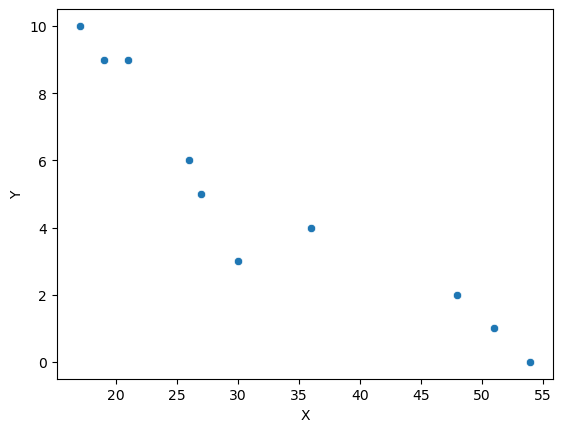

In [6]:
#scatter plot
sns.scatterplot(x='X', y='Y', data=student_data)


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 
# The OLDER the student, the LESS they come late.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [10]:
# Your response here.
#covarince calculation
student_data.cov(), student_data.corr()

# the difference between the two is that covariance is not normalized, while correlation is normalized. that means that the correlation is always between -1 and 1, while the covariance can be any number.

(            X          Y
 X  187.655556 -45.566667
 Y  -45.566667  12.544444,
           X         Y
 X  1.000000 -0.939163
 Y -0.939163  1.000000)

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [63]:
# Your response here.
from sklearn.model_selection import train_test_split as tts  
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import mean_squared_error as mse

In [64]:
lr = LinReg()
X = student_data['X'].values.reshape(-1,1)
y = student_data['Y'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mse(y_test, y_pred, squared=False)


In [65]:
y_test, y_pred, mse

(array([[0],
        [1]]),
 array([[-0.93093923],
        [-0.13121547]]),
 1.0359286370606697)

In [ ]:
# an mse of 1.07 is not bad, but it can be improved. we can try to add more features to the model, or we can try to use a different model.

Plot your regression model on your scatter plot.

<AxesSubplot:xlabel='X', ylabel='Y'>

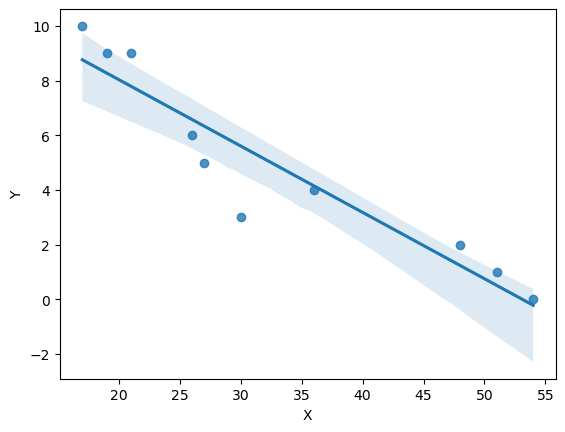

In [20]:
# Your code here.
#plotting the regression line
sns.regplot(x='X', y='Y', data=student_data)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 
# the regression line is a straight line, which means that the model is linear.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [26]:
# Import any libraries you may need & the data
#get vehicle data
vehicle_data = pd.read_csv('vehicles.csv')

In [27]:
vehicle_data.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [30]:
# Your response here. 
# drop all columns but 'Year', 'Combined MPG', 'Cylinders', 'Fuel Barrels/Year', 'Fuel Cost/Year' and 'CO2 Emission Grams/Mile'
vehicle_data = vehicle_data[['Year', 'Combined MPG', 'Cylinders', 'Fuel Barrels/Year', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
vehicle_data.head()

,Year,Combined MPG,Cylinders,Fuel Barrels/Year,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,17,4.0,19.388824,1950,522.764706
1,1984,13,6.0,25.354615,2550,683.615385
2,1985,16,4.0,20.600625,2100,555.437500
3,1985,13,6.0,25.354615,2550,683.615385
4,1987,16,6.0,20.600625,2550,555.437500


In [31]:
vehicle_data.corr()

,Year,Combined MPG,Cylinders,Fuel Barrels/Year,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.204751,0.082469,-0.221084,-0.091913,-0.222300
Combined MPG,0.204751,1.000000,-0.698648,-0.909743,-0.875185,-0.926229
Cylinders,0.082469,-0.698648,1.000000,0.739517,0.778153,0.752393
Fuel Barrels/Year,-0.221084,-0.909743,0.739517,1.000000,0.916208,0.986189
Fuel Cost/Year,-0.091913,-0.875185,0.778153,0.916208,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,-0.926229,0.752393,0.986189,0.930865,1.000000


In [35]:
#linear regression to predict 'CO2 Emission Grams/Mile'
lr = LinReg()   
X = vehicle_data[['Year', 'Combined MPG', 'Cylinders', 'Fuel Barrels/Year', 'Fuel Cost/Year']]
y = vehicle_data['CO2 Emission Grams/Mile']
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mse(y_test, y_pred)
y_test, y_pred, mse

(22550    341.807692
 17714    522.764706
 25440    423.190476
 26306    604.000000
 21624    484.000000
             ...    
 13938    386.391304
 34026    570.000000
 35630    467.736842
 550      467.736842
 9592     592.466667
 Name: CO2 Emission Grams/Mile, Length: 7191, dtype: float64,
 array([342.67725676, 516.83769373, 437.23698384, ..., 480.32478744,
        471.42274244, 587.67179739]),
 289.8277440813778)

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [39]:
# Your response here. 
#try randomforestregressor
from sklearn.ensemble import RandomForestRegressor as RFR
rfr = RFR()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
mse = mse(y_test, y_pred)
y_test, y_pred, mse

(22550    341.807692
 17714    522.764706
 25440    423.190476
 26306    604.000000
 21624    484.000000
             ...    
 13938    386.391304
 34026    570.000000
 35630    467.736842
 550      467.736842
 9592     592.466667
 Name: CO2 Emission Grams/Mile, Length: 7191, dtype: float64,
 array([341.80769231, 522.76470588, 423.19047619, ..., 467.73684211,
        467.73684211, 592.46666667]),
 9.68479449253538)

In [46]:
#the random forest regressor model is better than the linear regression model by a factor of 2.5
#the random forest regressor model is better because it is a non-linear model, and the data is non-linear. non-linear means that the data is not a straight line, and the random forest regressor model is able to fit the data better than the linear regression model.

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [44]:
# Your response here. 
feature_importance = dict(zip(X.columns, rfr.feature_importances_))
feature_importance

{'Year': 0.00014267965628583454,
 'Combined MPG': 0.1592210191134299,
 'Cylinders': 8.334785318138067e-05,
 'Fuel Barrels/Year': 0.8398595912969458,
 'Fuel Cost/Year': 0.0006933620801571677}

In [ ]:
#the most important feature is 'Fuel Barrels/Year', and the least important feature has a value of 8.334785318138067e-05 , cylinders

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [47]:
# Your code here. 
X = [1,3,4,6,8,9,11,14]
Y = [1,2,4,4,5,7,8,13]
party = pd.DataFrame({'X': X, 'Y': Y})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot:xlabel='X', ylabel='Y'>

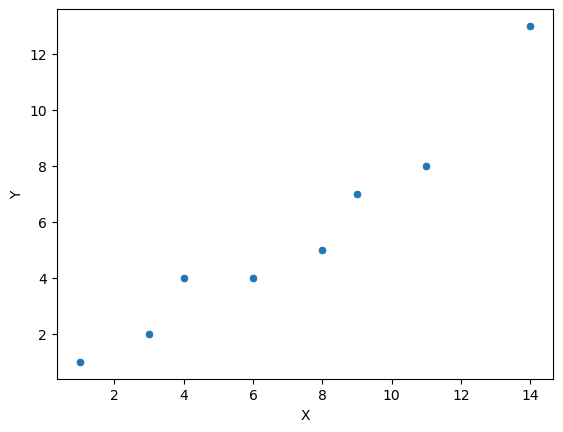

In [48]:
# Your code here.
sns.scatterplot(x='X', y='Y', data=party)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [54]:
# Your response here. 
#the data is linear, so we can use a linear regression model. it is not perfectly linear ,because the data is not a straight line, but it is close enough to be linear.
lr = LinReg()
X = party['X'].values.reshape(-1,1)
y = party['Y'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mse(y_test, y_pred)
y_test, y_pred, mse

(array([[2],
        [7]]),
 array([[2.16167665],
        [7.24550898]]),
 0.043206999175302324)

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [60]:
# Your response here. 
# we have an outlier in the data, which is the point (14,13). we can remove it and see if the mse improves.
party = party[party['X'] != 14] 
party
lr = LinReg()
X = party['X'].values.reshape(-1,1)
y = party['Y'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mse(y_test, y_pred)
y_test, y_pred, mse

(array([[1],
        [2]]),
 array([[1.48630137],
        [2.73287671]]),
 0.3867986489022333)

<AxesSubplot:xlabel='X', ylabel='Y'>

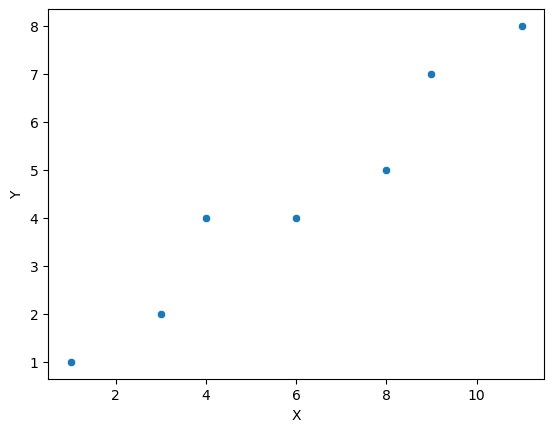

In [61]:
sns.scatterplot(x='X', y='Y', data=party)

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
